In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
sacog = pd.read_excel('../data/manipulatedData/sacog_with_new_variables.xlsx')

In [3]:
sacog.shape

(327, 754)

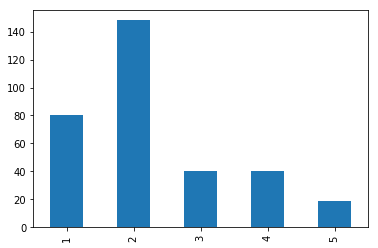

In [4]:
sacog['NumberInHousehold'].value_counts().sort_index().plot(kind='bar')

In [4]:
cat = ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']

### 1) Change in purchase frequency before and after pandemic

In [6]:
dict_ = {1: 'Never', 
         2: '< 1/month', 
         3: '< 1/week',
         4: '1/week',
         5: '2 - 3/week',
         6: '3 - 5/week',
         7: '> 5/week'
         }

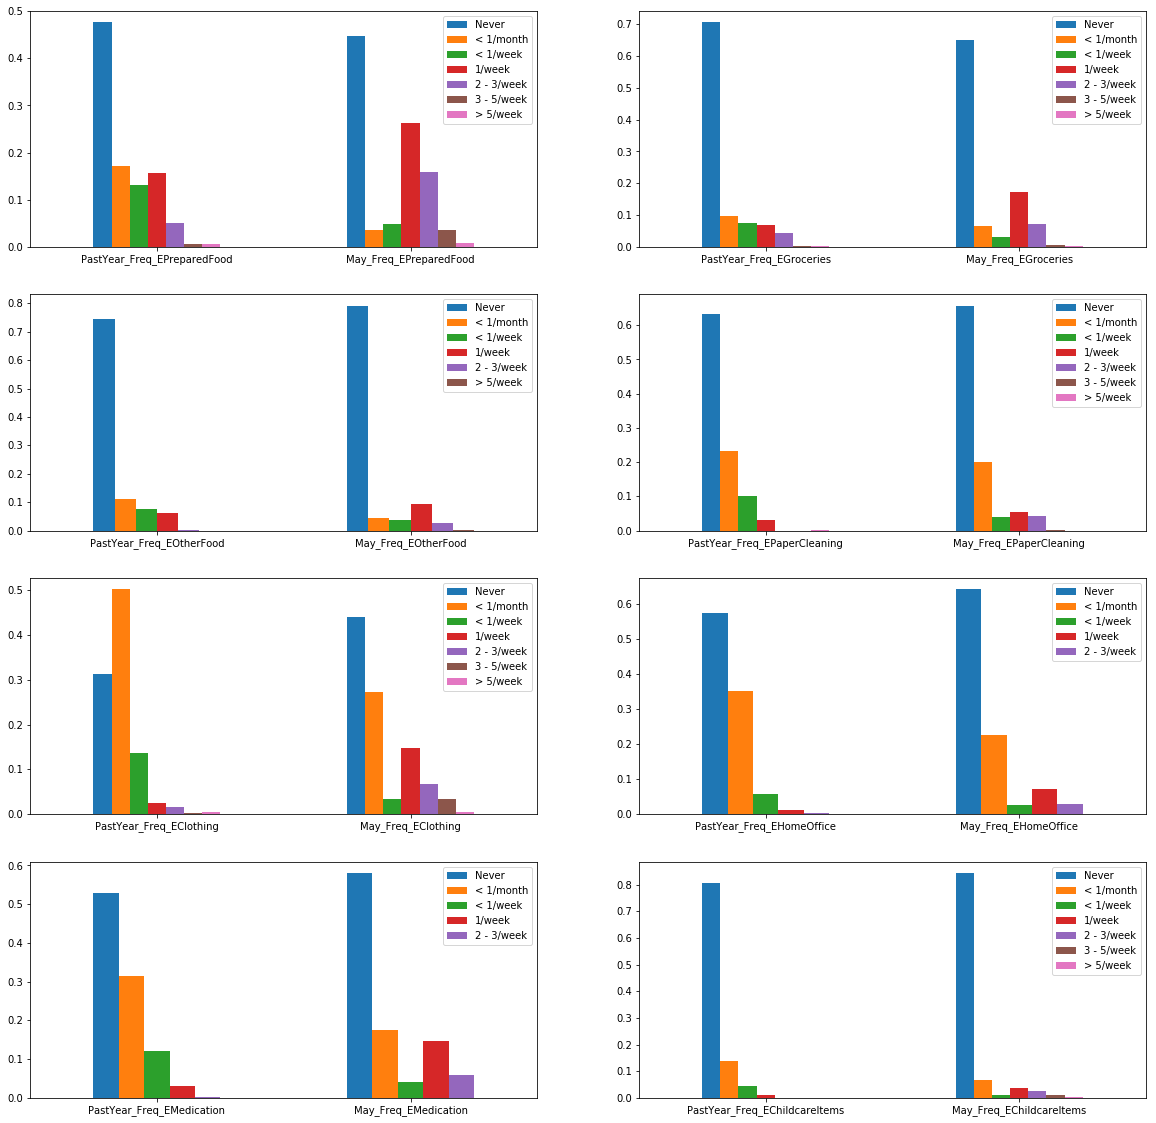

In [7]:
plt.figure(figsize=(20, 20))
for i in range(len(cat)):
    plt.subplot(4, 2,i+1)
    pastYear = sacog['PastYear_Freq_E'+cat[i]].value_counts(normalize = True).sort_index().to_frame()
    May = sacog['May_Freq_E'+cat[i]].value_counts(normalize = True)
    pastYear.join(May, how = 'outer').T.plot(kind='bar',ax=plt.gca())
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, [dict_[int(i)] for i in labels])
    plt.xticks(rotation = 0)

#### Key takeaways: online shopping frequency increases

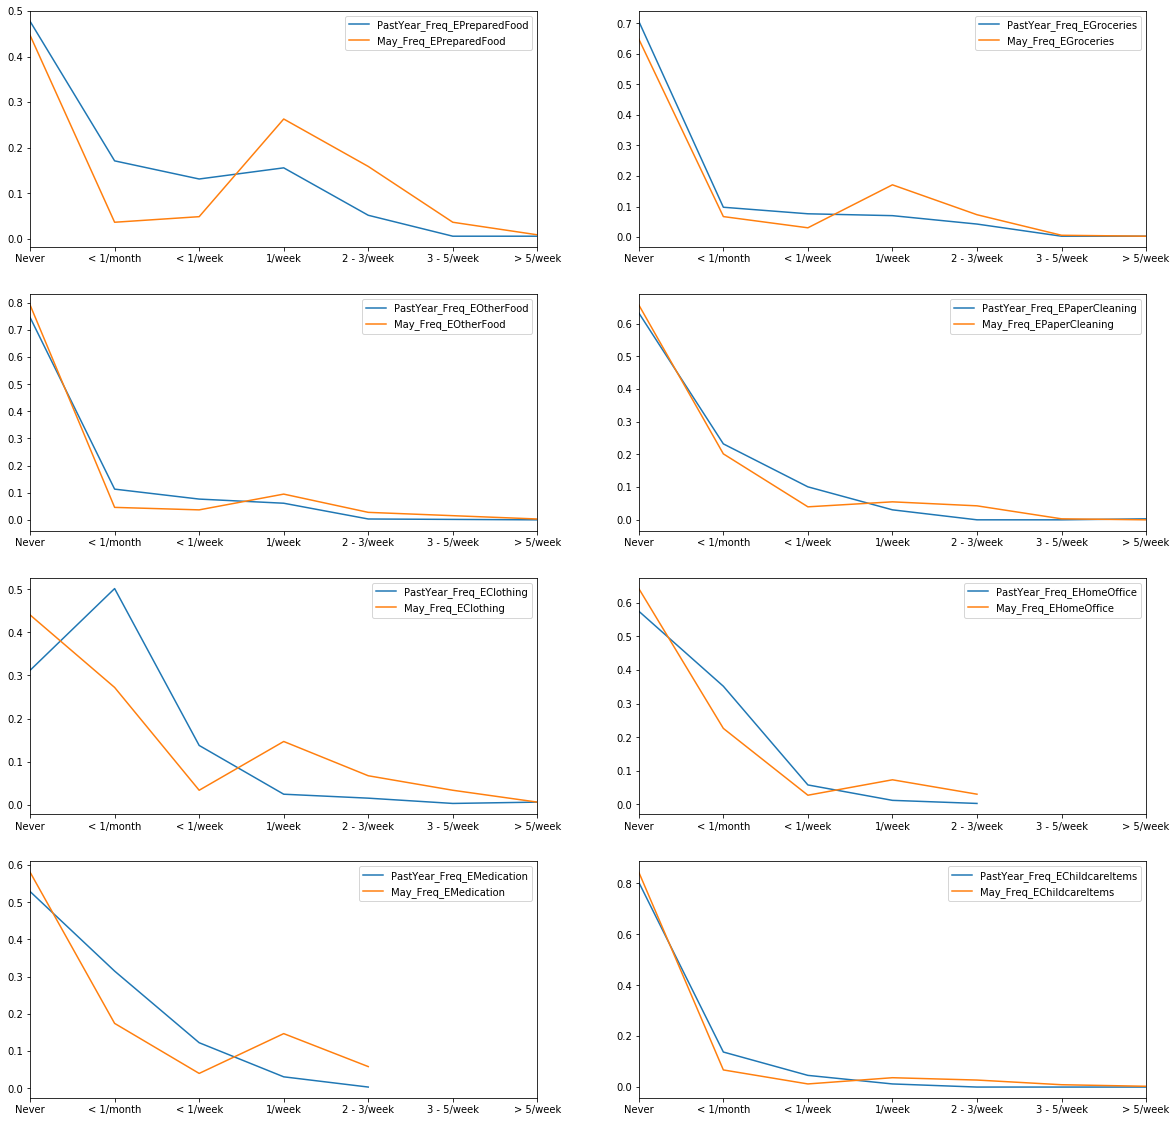

In [8]:
plt.figure(figsize=(20, 20))
for i in range(len(cat)):
    plt.subplot(4, 2,i+1)
    pastYear = sacog['PastYear_Freq_E'+cat[i]].value_counts(normalize = True).sort_index().to_frame()
    May = sacog['May_Freq_E'+cat[i]].value_counts(normalize = True)
    df = pastYear.join(May, how = 'outer').fillna(0)
    df.plot(kind='line',ax=plt.gca())
    plt.xticks([1,2,3,4,5,6,7], [dict_[i] for i in range(1,8)], rotation = 0)
    

See reverse behavior that people who did online grocery shopping 1/week (13) or 2-3/week (8) past year turn to in-store shopping only instead, same for preparedfood.

In [12]:
pd.crosstab(sacog['PastYear_Freq_E'+cat[7]], sacog['May_Freq_E'+cat[7]], margins = True)

May_Freq_EChildcareItems,1,2,3,4,5,6,7,All
PastYear_Freq_EChildcareItems,,,,,,,,
1,256,4,1,1,1,0,0,263
2,14,17,2,7,5,0,0,45
3,5,1,1,1,3,3,1,15
4,1,0,0,3,0,0,0,4
All,276,22,4,12,9,3,1,327


#### Purchase demand
Prepared food is most frequently purchased, nearly 8 times per month in total, followed by groceries. And childcareItems were purchased the least, about once a month. In terms of in-store purchase, Groceries had the highest frequency, about 6 times per month, followed by prepared food (4.34). Similarly, childcareItems had the lowest frequency. In terms of proportion purchased online, however, groceries had the least ratio while childcareItem had the largest, followed by clothing. <br />
For online purchase, in May, prepared food was the most purchased, about 3.5 times per month, followed by clothing, about 2.3 times per month. ChildcareItems were the least purchased, about 0.74 times per month. Online shopping frequency in May increased across all categories compared to past year but the ranking of purchase frequency across all categories is consistent.


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

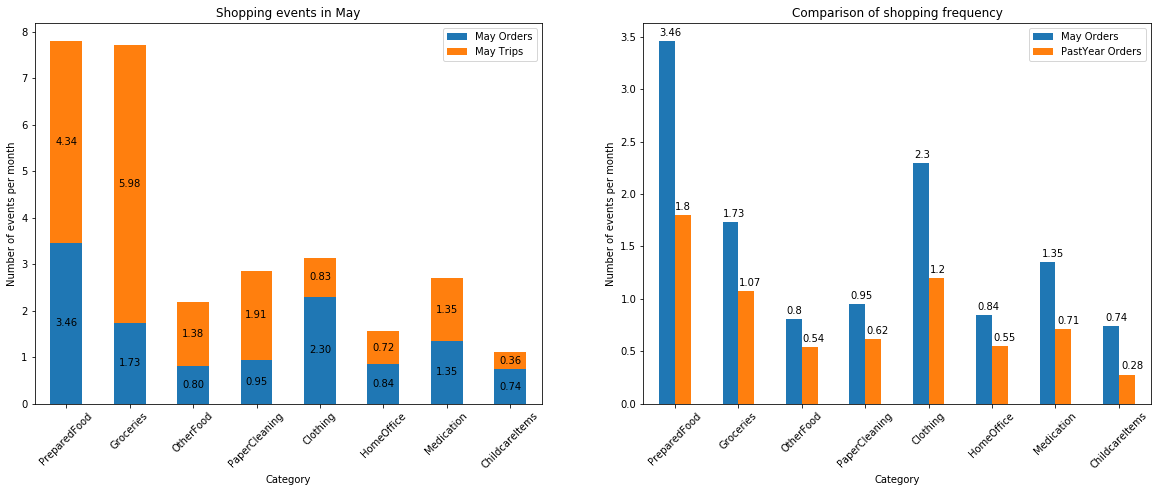

In [7]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
PurchaseFreq = pd.DataFrame(index = cat)
PurchaseFreq['May Orders'] = sacog[['May-Orders-'+cat_ for cat_ in cat]].mean().values
PurchaseFreq['May Trips'] = sacog[['May-Trips-'+cat_ for cat_ in cat]].mean().values
PurchaseFreq['PastYear Orders'] = sacog[['PastYear-Orders-'+cat_ for cat_ in cat]].mean().values
PurchaseFreq.iloc[:,:2].plot(kind='bar', stacked = True, ax = plt.gca())
plt.xlabel('Category')
plt.ylabel('Number of events per month')
plt.title('Shopping events in May')
plt.xticks(rotation=45)
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    
    label_text = f'{height:.2f}'
    label_x = x + width/2
    label_y = y + height/2
    plt.gca().text(label_x, label_y, label_text, ha = 'center', va = 'center', fontsize = 10)

plt.subplot(1, 2, 2)
PurchaseFreq.iloc[:,[0,2]].plot(kind='bar', ax = plt.gca())
for p in plt.gca().patches:
    plt.gca().annotate(round(p.get_height(), 2), (p.get_x() * 1.005, p.get_height() + 0.05))
plt.xlabel('Category')
plt.ylabel('Number of events per month')
plt.title('Comparison of shopping frequency')
plt.xticks(rotation=45)

In [ ]:
sacog_demo[['May-Orders-'+]]

In [56]:
sacog[['May-Total-'+cat_ for cat_ in cat]].mean()

May-Total-PreparedFood     7.792049
May-Total-Groceries        7.715596
May-Total-OtherFood        2.180428
May-Total-PaperCleaning    2.856269
May-Total-Clothing         3.131498
May-Total-HomeOffice       1.565749
May-Total-Medication       2.700306
dtype: float64

In [15]:
sacog[['May-Portion-E'+cat_ for cat_ in cat]].describe().T

,count,mean,std,min,25%,50%,75%,max
May-Portion-EPreparedFood,275.0,0.376182,0.325522,0.0,0.000000,0.5,0.615385,1.0
May-Portion-EGroceries,320.0,0.168374,0.272382,0.0,0.000000,0.0,0.333333,1.0
May-Portion-EOtherFood,169.0,0.276602,0.386999,0.0,0.000000,0.0,0.500000,1.0
May-Portion-EPaperCleaning,270.0,0.232929,0.329602,0.0,0.000000,0.0,0.500000,1.0
May-Portion-EClothing,248.0,0.523345,0.374466,0.0,0.000000,0.5,0.923077,1.0
May-Portion-EHomeOffice,181.0,0.442515,0.384540,0.0,0.000000,0.5,0.800000,1.0
May-Portion-EMedication,234.0,0.391958,0.377580,0.0,0.000000,0.5,0.666667,1.0
May-Portion-EChildcareItems,66.0,0.565926,0.386878,0.0,0.233333,0.5,1.000000,1.0


In [16]:
sacog[['May-Orders-'+cat_ for cat_ in cat]].describe().T

,count,mean,std,min,25%,50%,75%,max
May-Orders-PreparedFood,327.0,3.455657,4.812786,0.0,0.0,2.0,4.0,32.0
May-Orders-Groceries,327.0,1.730887,3.780122,0.0,0.0,0.0,4.0,44.0
May-Orders-OtherFood,327.0,0.804281,2.195557,0.0,0.0,0.0,0.0,24.0
May-Orders-PaperCleaning,327.0,0.948012,2.272884,0.0,0.0,0.0,1.0,20.0
May-Orders-Clothing,327.0,2.296636,4.521329,0.0,0.0,1.0,4.0,44.0
May-Orders-HomeOffice,327.0,0.844037,1.804090,0.0,0.0,0.0,1.0,12.0
May-Orders-Medication,327.0,1.348624,2.332918,0.0,0.0,0.0,1.0,12.0
May-Orders-ChildcareItems,327.0,0.740061,2.890064,0.0,0.0,0.0,0.0,32.0


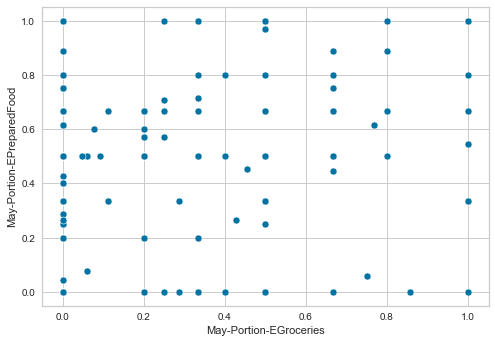

In [147]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data = sacog, x = 'May-Portion-EGroceries', y = 'May-Portion-EPreparedFood')

In [18]:
sacog[['May-Total-'+cat[i] for i in range(len(cat))]].describe()/4

,May-Total-PreparedFood,May-Total-Groceries,May-Total-OtherFood,May-Total-PaperCleaning,May-Total-Clothing,May-Total-HomeOffice,May-Total-Medication,May-Total-ChildcareItems
count,81.750000,81.750000,81.750000,81.750000,81.750000,81.750000,81.750000,81.750000
mean,1.948012,1.928899,0.545107,0.714067,0.782875,0.391437,0.675076,0.275229
std,1.828637,1.460665,0.813087,0.907983,1.151931,0.601050,0.740563,0.871066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,1.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,0.250000,0.500000,0.500000,0.250000,0.500000,0.000000
75%,2.750000,2.500000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000
max,12.000000,16.500000,6.250000,10.500000,11.000000,4.000000,4.000000,8.500000


### 2) kmeans for PastYear-Orders- & May-Orders

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.features import Rank2D

In [10]:
def choose_k(X, max_k):
    inertia = []
    silhouette_score_ = []
    X = X.fillna(0)
    K = range(2, max_k)
    for k in K:
        km = KMeans(n_clusters = k, n_init = 25, max_iter = 1000, init = 'k-means++')
        km.fit_transform(X)
        inertia.append(km.inertia_)
        silhouette_score_.append(silhouette_score(X, km.labels_))
    fig, ax = plt.subplots(1,2,figsize = (16, 6))
    ax[0].plot(K, inertia, 'go-')
    ax[0].set_xlabel('K')
    ax[0].set_ylabel('Inertia')
    ax[0].set_title('Elbow method for optimal K')
    ax[0].set_xticks(K)
    
    ax[1].plot(K, silhouette_score_, 'bx-')
    ax[1].set_xlabel('K')
    ax[1].set_ylabel('silhouette score')
    ax[1].set_title('Silhouette')
    ax[1].set_xticks(K)

In [11]:
def optimal_k(X, k):
    km = KMeans(n_clusters = k, n_init = 25, max_iter = 1000, init = 'k-means++', random_state=123)
    km.fit_transform(X.fillna(0))
    plt.figure(figsize = (16,5))
    plt.plot(X.columns, km.cluster_centers_.T)
    plt.xticks(rotation=45)
    display(np.unique(km.labels_, return_counts = True))
    return km

In [22]:
### Next step: 1) drop childcareItems, maybe also medication; 2) cha

### 2.1) PastYear EClass

In [31]:
cat = ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication']

In [23]:
X = sacog[['PastYear-Orders-'+cat_ for cat_ in cat]]/4
X.describe()

,PastYear-Orders-PreparedFood,PastYear-Orders-Groceries,PastYear-Orders-OtherFood,PastYear-Orders-PaperCleaning,PastYear-Orders-Clothing,PastYear-Orders-HomeOffice,PastYear-Orders-Medication
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.449541,0.267584,0.135321,0.154434,0.299694,0.136850,0.178135
std,0.758222,0.646691,0.297353,0.351164,0.546545,0.221978,0.261609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
75%,0.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
max,5.000000,5.000000,2.500000,5.000000,5.000000,2.500000,2.500000


In [24]:
sacog.iloc[317][['PastYear_Freq_E'+cat_ for cat_ in cat]]

PastYear_Freq_EPreparedFood     7
PastYear_Freq_EGroceries        7
PastYear_Freq_EOtherFood        5
PastYear_Freq_EPaperCleaning    7
PastYear_Freq_EClothing         7
PastYear_Freq_EHomeOffice       5
PastYear_Freq_EMedication       5
Name: 317, dtype: object

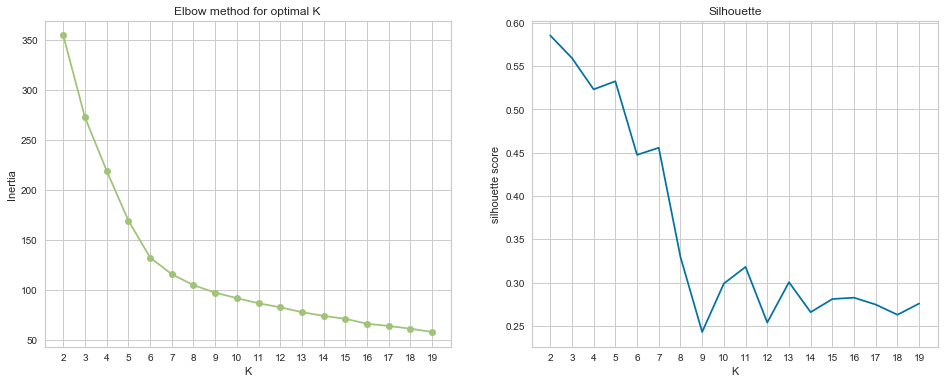

In [25]:
## household 317 is a outlier with frequency online shopping last year. 
## During May they purchase restaurant food online 8/month and do grocery instore 4/month, no shopping for other categories
choose_k(X, 20) 

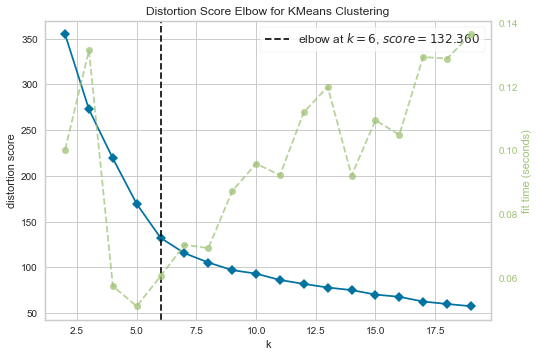

In [26]:
visualizer = KElbowVisualizer(KMeans(), k=(2, 20))
visualizer.fit(X)
visualizer.show()

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([226,  13,  18,  63,   1,   6]))

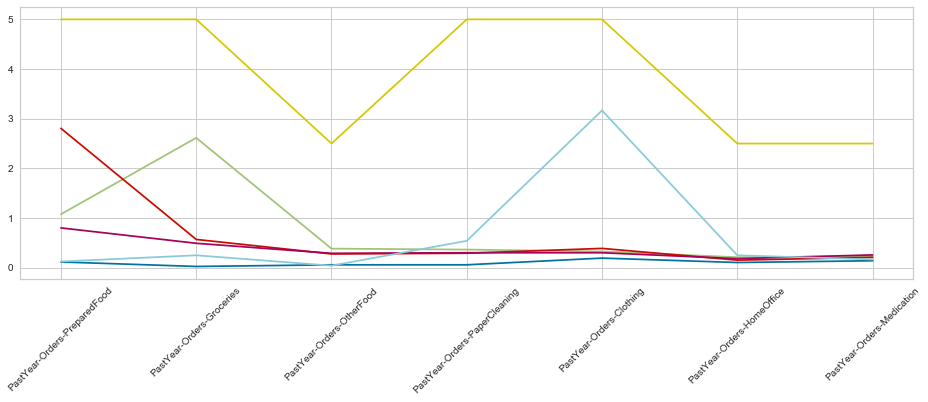

In [27]:
km_past = optimal_k(X, 6)

In [28]:
df = pd.DataFrame(km_past.cluster_centers_, columns = cat)
df['Group size'] = np.unique(km_past.labels_, return_counts = True)[1]
df

,PreparedFood,Groceries,OtherFood,PaperCleaning,Clothing,HomeOffice,Medication,Group size
0,0.116150,0.025442,0.058628,0.058628,0.193584,0.105088,0.140487,226
1,1.076923,2.615385,0.384615,0.365385,0.326923,0.211538,0.230769,13
2,2.805556,0.569444,0.277778,0.291667,0.388889,0.152778,0.208333,18
3,0.801587,0.492063,0.289683,0.301587,0.301587,0.182540,0.257937,63
4,5.000000,5.000000,2.500000,5.000000,5.000000,2.500000,2.500000,1
5,0.125000,0.250000,0.041667,0.541667,3.166667,0.250000,0.166667,6


### 2.2.1) May EClass

In [16]:
X = sacog[['May-Orders-'+cat_ for cat_ in cat]]/4
X.describe()

,May-Orders-PreparedFood,May-Orders-Groceries,May-Orders-OtherFood,May-Orders-PaperCleaning,May-Orders-Clothing,May-Orders-HomeOffice,May-Orders-Medication
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.863914,0.432722,0.201070,0.237003,0.574159,0.211009,0.337156
std,1.203196,0.945030,0.548889,0.568221,1.130332,0.451023,0.583229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.250000,1.000000,0.250000,0.250000
max,8.000000,11.000000,6.000000,5.000000,11.000000,3.000000,3.000000


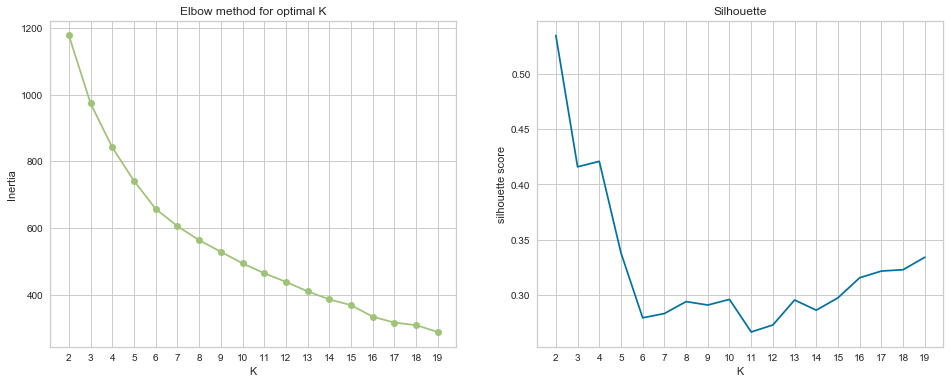

In [17]:
choose_k(X, 20)

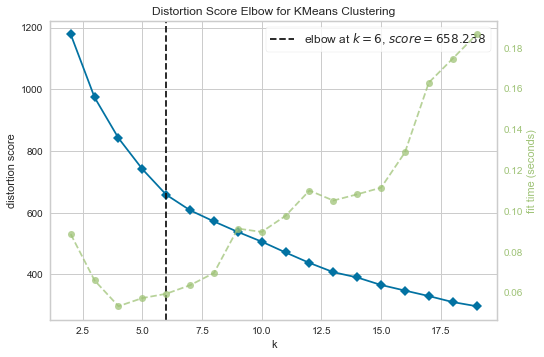

In [18]:
visualizer = KElbowVisualizer(KMeans(), k = (2, 20))
visualizer.fit(X)
visualizer.show()

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([107,  14, 139,  47,   1,  19]))

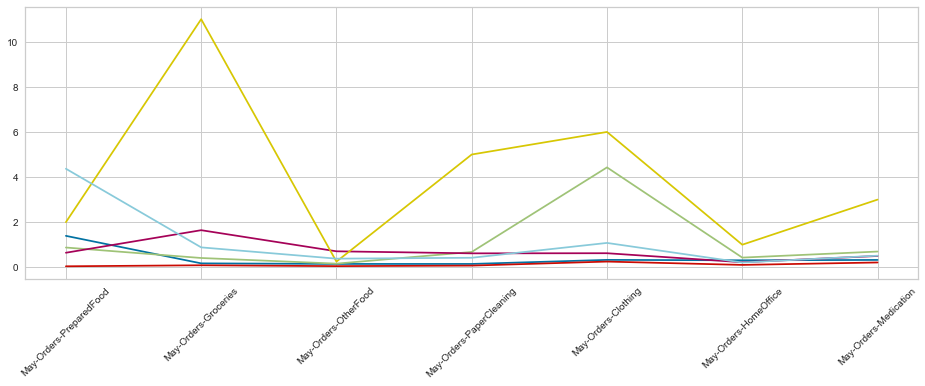

In [19]:
km1 = optimal_k(X, 6)

In [20]:
df = pd.DataFrame(km1.cluster_centers_, columns = cat)
df['group size'] = np.unique(km1.labels_, return_counts = True)[1]
df

,PreparedFood,Groceries,OtherFood,PaperCleaning,Clothing,HomeOffice,Medication,group size
0,1.392523,0.172897,0.147196,0.147196,0.327103,0.308411,0.324766,107
1,0.875000,0.410714,0.160714,0.678571,4.428571,0.428571,0.696429,14
2,0.043165,0.088129,0.050360,0.073741,0.251799,0.104317,0.212230,139
3,0.643617,1.643617,0.707447,0.617021,0.622340,0.223404,0.500000,47
4,2.000000,11.000000,0.250000,5.000000,6.000000,1.000000,3.000000,1
5,4.368421,0.881579,0.381579,0.421053,1.078947,0.210526,0.513158,19


In [21]:
X[km1.labels_ == 4]

,May-Orders-PreparedFood,May-Orders-Groceries,May-Orders-OtherFood,May-Orders-PaperCleaning,May-Orders-Clothing,May-Orders-HomeOffice,May-Orders-Medication
48,2.0,11.0,0.25,5.0,6.0,1.0,3.0


In [41]:
sacog[['May-Total-'+cat_ for cat_ in cat]].mean()/4

May-Total-PreparedFood     1.948012
May-Total-Groceries        1.928899
May-Total-OtherFood        0.545107
May-Total-PaperCleaning    0.714067
May-Total-Clothing         0.782875
May-Total-HomeOffice       0.391437
May-Total-Medication       0.675076
dtype: float64

In [29]:
pd.crosstab(km_past.labels_, km1.labels_, margins=True).rename(columns = {0: 'ECommerce Ind', 1: 'Efood', 2:'EGro', 3:'Online for nonFood & Res', 4:'ERes', 5:'Highly Dep'},
                                                         index = {0: 'ECommerce Ind', 1: 'ERes', 2: 'EGro & Res', 3: 'EClothing', 4: 'Highly Dep', 5: 'Somewhat ERes penetrated'})

col_0,ECommerce Ind,Efood,EGro,Online for nonFood & Res,ERes,Highly Dep,All
row_0,,,,,,,
ECommerce Ind,67,8,117,26,0,8,226
ERes,3,0,5,2,1,2,13
EGro & Res,9,1,4,1,0,3,18
EClothing,26,2,12,17,0,6,63
Highly Dep,1,0,0,0,0,0,1
Somewhat ERes penetrated,1,3,1,1,0,0,6
All,107,14,139,47,1,19,327


In [50]:
list(sacog.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Unnamed: 0.1.1.1',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistance-Medical',
 'May-TripDistance-Gym',
 'May-TripDistance-ToSchool',
 'May-TripDistance-FromSchool',
 'May-TripDistance-Bar',
 'May-TripDistance-MovieTheater',
 'May-TripDistance-Friends',
 'May-TripDistance-Family',
 'May-TripDistance-Other',
 'May-TripDistance-OtherType',
 'May-TripMode-Commuting',
 'May-TripMode-Medical',
 'May-TripMode-Gym',
 'May-TripMode-ToSchool',
 'May-TripMode-FromSchool',
 'May-TripMode-Bar',
 'May-TripMode-MovieTheater',
 'May-TripMode-Friends',
 'May-TripMode-Family',
 'May-TripMode-Other',
 '

### 2.2.2) May shopping style - relative frequency

#### Kmodes on categorical style

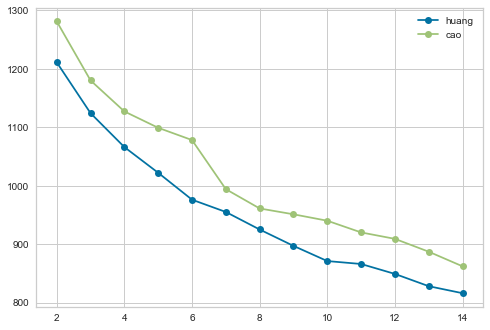

In [12]:
# Do kmodes clustering on categorical shopping style with different number of cluster k
X = sacog[['style1-'+cat_ for cat_ in cat]]
costh = []
costc = []
K = range(2, 15)
for i in K:
    kmh = KModes(n_clusters = i, init = 'huang', max_iter = 1000, n_init = 30)
    kmh.fit(X)
    costh.append(kmh.cost_)
    kmc = KModes(n_clusters = i, init = 'Cao', max_iter = 1000, n_init = 30)
    kmc.fit(X)
    costc.append(kmc.cost_)

plt.plot(K, costh, 'bo-', label = 'huang')
plt.plot(K, costc, 'go-', label = 'cao')
plt.legend()

In [13]:
# choose number of clusters based on Elbow method
kmo = KModes(n_clusters = 6, init = 'huang', n_init = 30, max_iter = 1000)
kmo.fit(X)
df = pd.DataFrame(kmo.cluster_centroids_, columns = cat)
df['group size'] = np.unique(kmo.labels_, return_counts = True)[1]
df

,PreparedFood,Groceries,OtherFood,PaperCleaning,Clothing,HomeOffice,Medication,ChildcareItems,group size
0,in-store only,in-store only,no shopping,in-store only,in-store only,no shopping,in-store only,no shopping,120
1,in-store only,in-store only,no shopping,no shopping,no shopping,no shopping,no shopping,no shopping,71
2,more online,same freq,more in-store,same freq,more online,no shopping,no shopping,no shopping,20
3,same freq,in-store only,in-store only,in-store only,same freq,no shopping,in-store only,no shopping,57
4,more online,online only,online only,online only,online only,online only,online only,no shopping,25
5,same freq,in-store only,no shopping,more in-store,same freq,same freq,same freq,no shopping,34


In [14]:
# KMode is not stable, the clustering result changes from time to time (compare above and below two cases)
kmo = KModes(n_clusters = 6, init = 'huang', n_init = 30, max_iter = 1000)
kmo.fit(X)
df = pd.DataFrame(kmo.cluster_centroids_, columns = cat)
df['group size'] = np.unique(kmo.labels_, return_counts = True)[1]
df

,PreparedFood,Groceries,OtherFood,PaperCleaning,Clothing,HomeOffice,Medication,group size
0,same freq,in-store only,in-store only,in-store only,more online,no shopping,same freq,85
1,in-store only,in-store only,no shopping,in-store only,same freq,no shopping,no shopping,89
2,no shopping,in-store only,no shopping,no shopping,no shopping,no shopping,no shopping,52
3,same freq,more in-store,more in-store,in-store only,same freq,no shopping,in-store only,25
4,more online,online only,online only,online only,online only,online only,online only,27
5,in-store only,in-store only,in-store only,in-store only,in-store only,in-store only,in-store only,49


#### Since Kmodes didn't consider the order within category, numerically encode shopping style categories instead

In [32]:
# Map level of online shopping dependency to ordered number: no shopping -> online only: 0 -> 5
dict_ = {'no shopping': 0,
        'in-store only': 1,
        'more in-store': 2,
        'same freq': 3,
        'more online': 4,
        'online only': 5}

In [33]:
# Create new dataset with numerically ordered shopping style for clustering
X_ = pd.DataFrame()
for cat_ in cat:
    X_['style-'+cat_] = X['style1-'+cat_].map(dict_)    

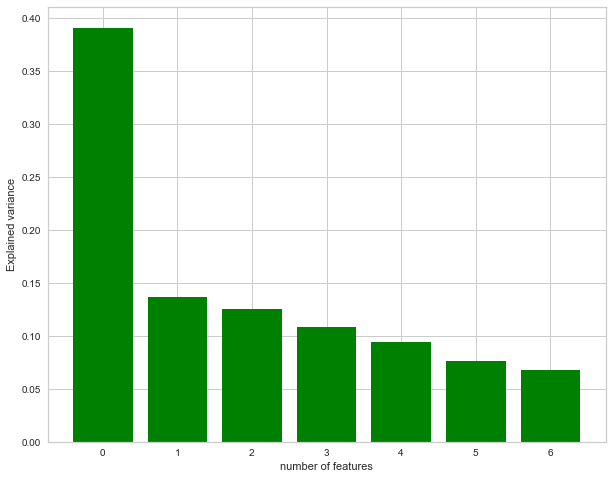

In [34]:
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X_)

pca = PCA(n_components = 7)
principalComponents = pca.fit_transform(X_std)

features = range(pca.n_components_)
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(features, pca.explained_variance_ratio_, color = 'green')
ax.set_xlabel('number of features')
ax.set_ylabel('Explained variance')
ax.set_xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [35]:
PCA_components.rename(columns = {0:'0', 1:'1',2:'2',3:'3',4:'4',5:'5'}, inplace = True)

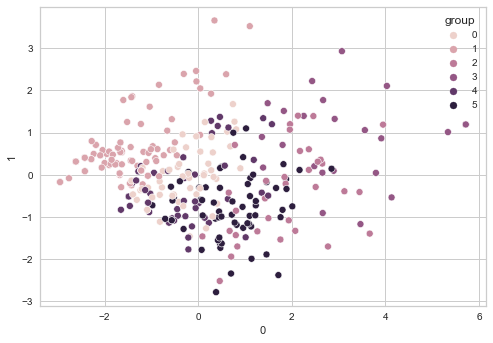

In [36]:
PCA_components['group'] = km.labels_
sns.scatterplot(x = '0', y = '1', data = PCA_components, hue = 'group')

In [18]:
X_
print(pca.components_[0])
print(pca.components_[1])

[0.27699424 0.35396479 0.33231994 0.448711   0.39756651 0.38352294
 0.3195221  0.28100119]
[ 0.19644413  0.44909651  0.557058    0.05296017 -0.27132128 -0.25519203
 -0.23603829 -0.50214675]


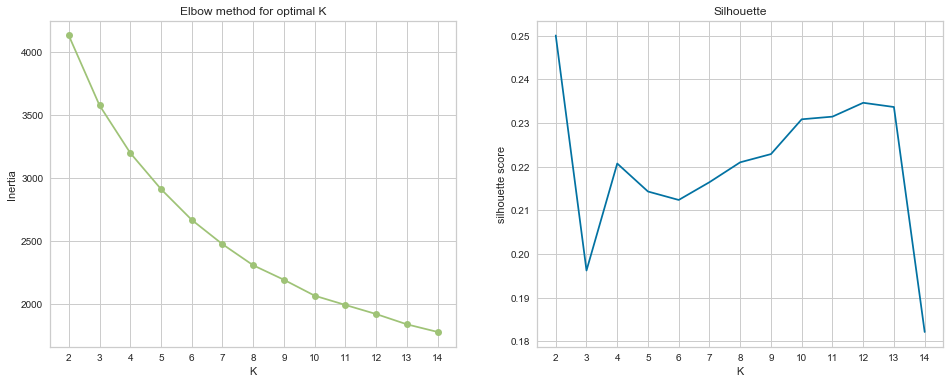

In [37]:
choose_k(X_, 15)

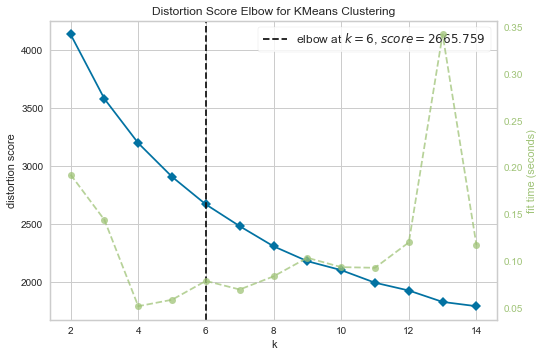

In [38]:
visualizer = KElbowVisualizer(KMeans(), k = (2,15))
visualizer.fit(X_)
visualizer.show()

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([50, 74, 53, 70, 49, 31]))

,PreparedFood,Groceries,OtherFood,PaperCleaning,Clothing,HomeOffice,Medication,group size
0,1.76,1.52,0.94,1.36,3.98,0.58,0.66,50
1,2.52703,1.72973,0.72973,2.2027,3.45946,3.7973,2.51351,74
2,1.79245,1.58491,0.660377,1.56604,2.28302,0.584906,3.96226,53
3,0.7,1.17143,0.414286,0.642857,0.328571,0.385714,0.414286,70
4,3.65306,1.59184,1.06122,1.08163,0.755102,0.571429,0.938776,49
5,3.06452,2.96774,4.48387,3.48387,3.90323,3.29032,3.06452,31


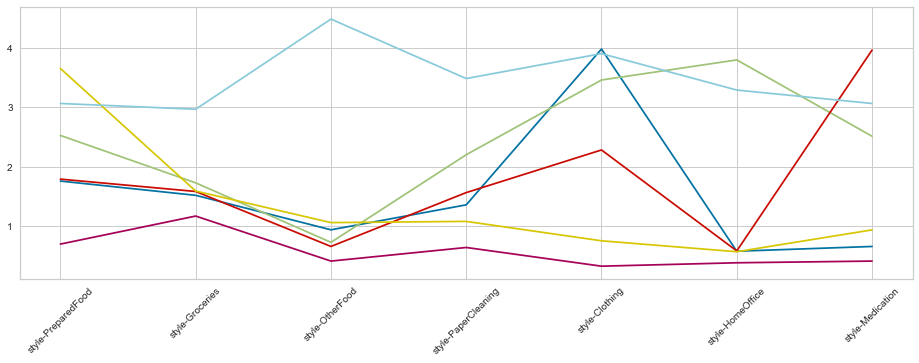

In [39]:
# test... the clustering result is not stable...
km_t = optimal_k(X_, 6)
df = pd.DataFrame(km_t.cluster_centers_, columns = cat)
df['group size'] = np.unique(km_t.labels_, return_counts = True)[1]
df.style.background_gradient()

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([50, 74, 53, 70, 49, 31]))

,PreparedFood,Groceries,OtherFood,PaperCleaning,Clothing,HomeOffice,Medication,group size
0,1.76,1.52,0.94,1.36,3.98,0.58,0.66,50
1,2.52703,1.72973,0.72973,2.2027,3.45946,3.7973,2.51351,74
2,1.79245,1.58491,0.660377,1.56604,2.28302,0.584906,3.96226,53
3,0.7,1.17143,0.414286,0.642857,0.328571,0.385714,0.414286,70
4,3.65306,1.59184,1.06122,1.08163,0.755102,0.571429,0.938776,49
5,3.06452,2.96774,4.48387,3.48387,3.90323,3.29032,3.06452,31


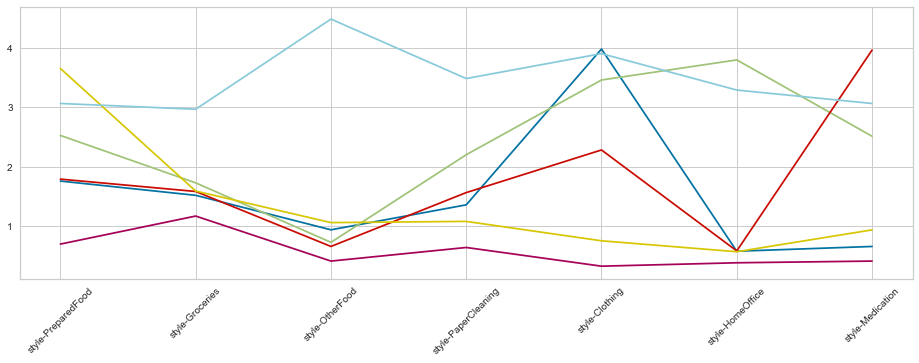

In [40]:
# 6 Groups of shopping style during the pandemic are identified: set random seed to stablize the result first..
km = optimal_k(X_, 6)
df = pd.DataFrame(km.cluster_centers_, columns = cat)
df['group size'] = np.unique(km.labels_, return_counts = True)[1]
df.style.background_gradient()

In [41]:
# what's the most frequent purchase channel for different category within each group
style = sacog.groupby(km.labels_)[['style1-'+ cat_ for cat_ in cat]].agg(lambda x: x.value_counts().index[0])
style

,style1-PreparedFood,style1-Groceries,style1-OtherFood,style1-PaperCleaning,style1-Clothing,style1-HomeOffice,style1-Medication
0,in-store only,in-store only,no shopping,in-store only,same freq,no shopping,in-store only
1,same freq,in-store only,no shopping,in-store only,same freq,same freq,same freq
2,in-store only,in-store only,no shopping,in-store only,in-store only,no shopping,more online
3,in-store only,in-store only,no shopping,in-store only,no shopping,no shopping,no shopping
4,same freq,in-store only,no shopping,in-store only,no shopping,no shopping,in-store only
5,same freq,same freq,online only,online only,online only,online only,online only


Characteristics of each group

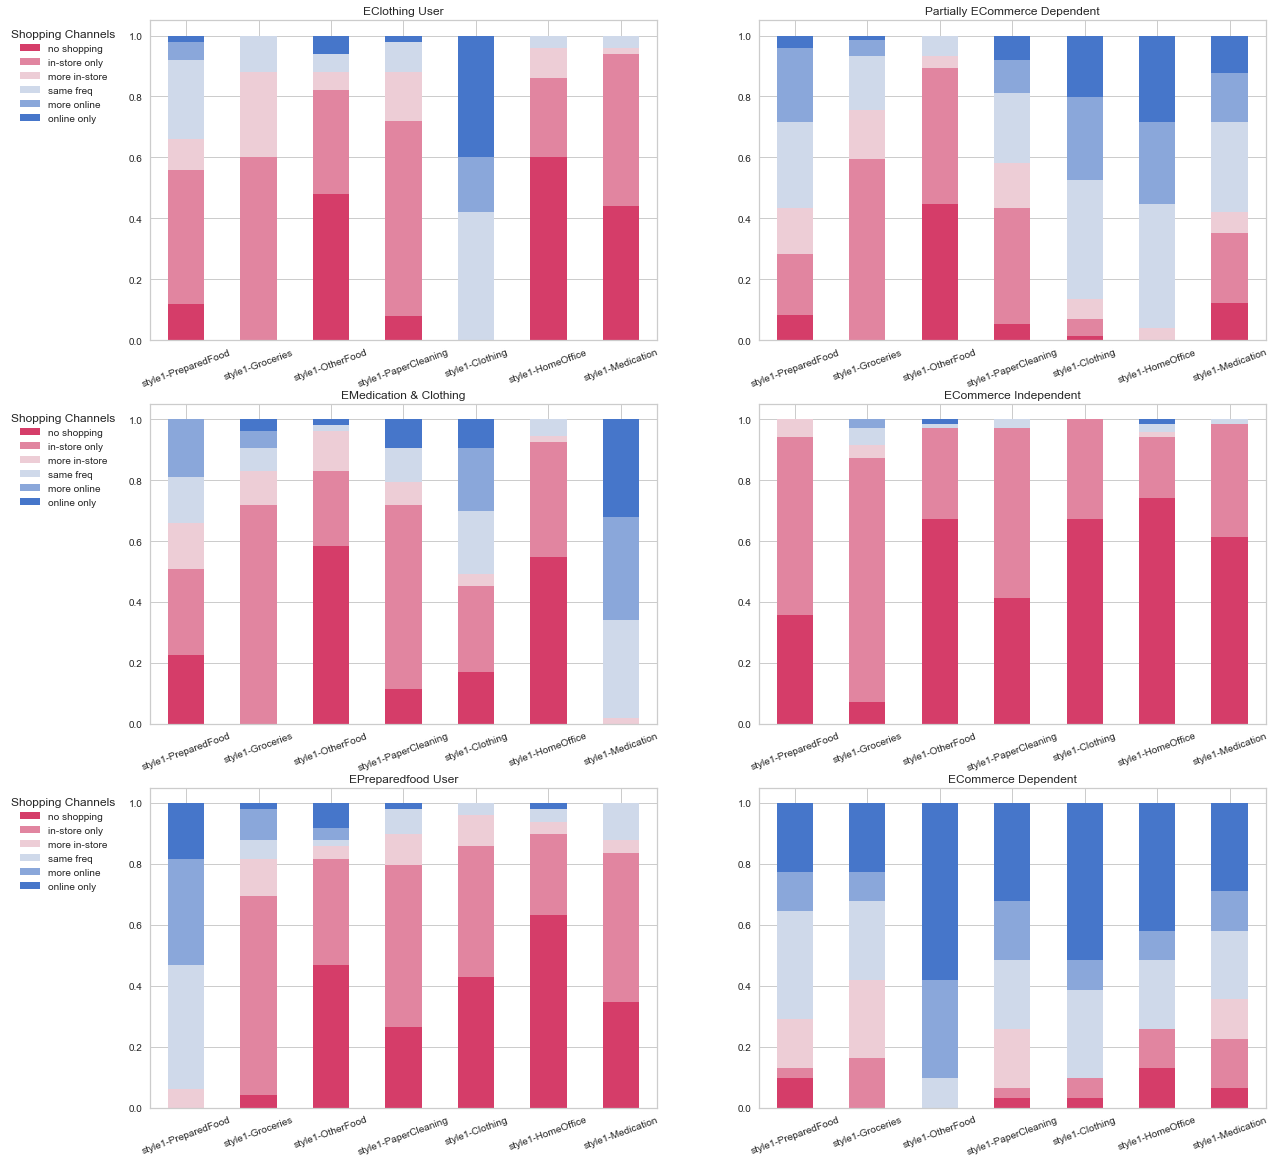

In [58]:
# Name each group based on their shopping channels for different category
group = ['EClothing User', 'Partially ECommerce Dependent', 'EMedication & Clothing', 'ECommerce Independent', 'EPreparedfood User', 'ECommerce Dependent' ]

# Visualize the shopping characteristics for each group: 
# will they purchase certain products or not, if they did, through what channel(s)?
order = pd.Categorical(['no shopping', 'in-store only', 'more in-store', 'same freq', 'more online', 'online only'], ordered = True)
plt.figure(figsize=(20, 20))
for j in range(6):
    plt.subplot(3, 2, j+1)
    df = pd.DataFrame()
    for i in range(7):
        summary = sacog[km.labels_ == j]['style1-'+ cat[i]].value_counts(normalize = True).to_frame()
        df = df.join(summary, how='outer')
    df.reindex(order).T.plot(kind = 'bar', stacked = True, ax = plt.gca(), color=tuple(list(sns.diverging_palette(0, 255, sep=1, n=6))))
    plt.xticks(rotation=20)
    plt.title(group[j])
    plt.legend(title='Shopping Channels', bbox_to_anchor=(-.05, 1), loc='upper right')
    if j % 2 == 1:
        plt.gca().get_legend().remove()

For different shopping style, regarding certain category, if purchase, by how much would they buy through online channel? <br>
Partially ECommerce dependent group are still more prone to in-store shopping except for clothing and home office supplies while ECommerce dependent group nearly shopped all categories of producrs more frequently through online channel. Even for groceries, half of the demand were satisfied online. <br>
For EClothing User, for all clothing shopping events, 75% were done through online channel. They also started to fulfill part of their shopping demand (24.6% of preparedfood and 20.6% of other food) online. <br> 
And for EPreparedFood Users, among all orders, 65.8% were done online, which is the highest among all groups. For EMedication & Clothing Users, 74.7% Medication purchase were completed through online channel. Users in this group were also quite penetrated by online preparedfood and clothing shopping (32% and 46% fulfilled online respectively). 

In [44]:
# For each group, if purchase, by how much will they buy through online channel?
portion = sacog.groupby(km.labels_)[['May-Portion-E'+cat_ for cat_ in cat]].mean().set_axis(group, inplace=False)
portion['group size'] = np.unique(km.labels_, return_counts = True)[1]
portion

,May-Portion-EPreparedFood,May-Portion-EGroceries,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EClothing,May-Portion-EHomeOffice,May-Portion-EMedication,group size
EClothing User,0.245688,0.123335,0.206410,0.121222,0.747935,0.120000,0.047619,50
Partially ECommerce Dependent,0.428575,0.178635,0.078862,0.337460,0.635889,0.705792,0.467460,74
EMedication & Clothing,0.321277,0.140092,0.150000,0.185131,0.460804,0.076389,0.747170,53
ECommerce Independent,0.030265,0.068132,0.065217,0.024390,0.000000,0.129630,0.018519,70
EPreparedfood User,0.658322,0.156625,0.248168,0.118519,0.095238,0.140741,0.110417,49
ECommerce Dependent,0.596599,0.492876,0.867527,0.657489,0.767697,0.695062,0.564368,31


Household size across groups

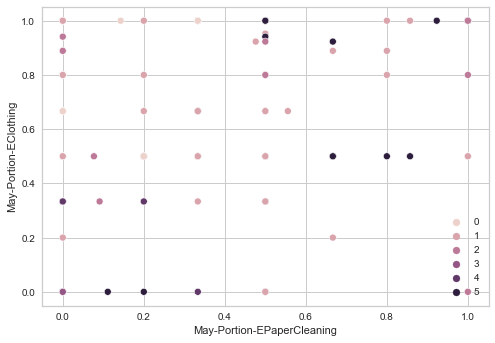

In [63]:
sns.scatterplot(x = 'May-Portion-EPaperCleaning', y = 'May-Portion-EClothing', data = sacog, hue = km.labels_)

#### Household Size

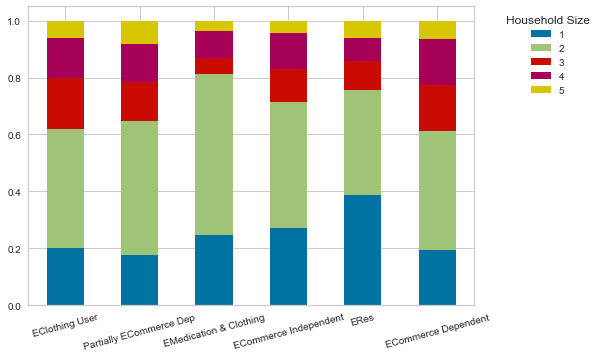

In [60]:
dict_ = {0: 'EClothing User', 1: 'Partially ECommerce Dep', 2: 'EMedication & Clothing', 3: 'ECommerce Independent', 4: 'ERes', 5: 'ECommerce Dependent'}
df = pd.DataFrame()
for i in range(6):
    summary = sacog[km.labels_ == i]['NumberInHousehold'].value_counts(normalize=True).sort_index().to_frame().rename(columns = {'NumberInHousehold': dict_[i]})
    df = df.join(summary, how = 'outer')
df.T.plot(kind='bar', stacked=True)
plt.xticks(rotation = 15)
plt.legend(title = 'Household Size', bbox_to_anchor = (1.05, 1), loc='upper left')

#### Total purchase demand <br>
In terms of total purchase demand, ECommerce dependent group generally had more purchasing events (for grocery, other food, paper cleaning, and home office supplies.) while partially ECommerce dependent group usually ranked the second. EPerparedfood Users had the most purchase events on preparedfood, EClothing Users had the most clothing purchase events while EMedication users had the most medication purchase events. Except for grocery, which served as the basic for living, ECommerce independent group generally had the least purchase events across all other categories, which means that during the pandemic, online shopping served as the main channel for shopping demand/desire. <br> 
For grocery shopping, EPreparedfood Users had the least events. This group of people is more likely to have outside food rather than cook for themselves compared to the other groups. One reason behind this is that, the portion of single household within this group is higher than the others. The convenience cooked food could bring was appealing to single household than household with larger size. [MAYBE can check the average age of this group]<br>


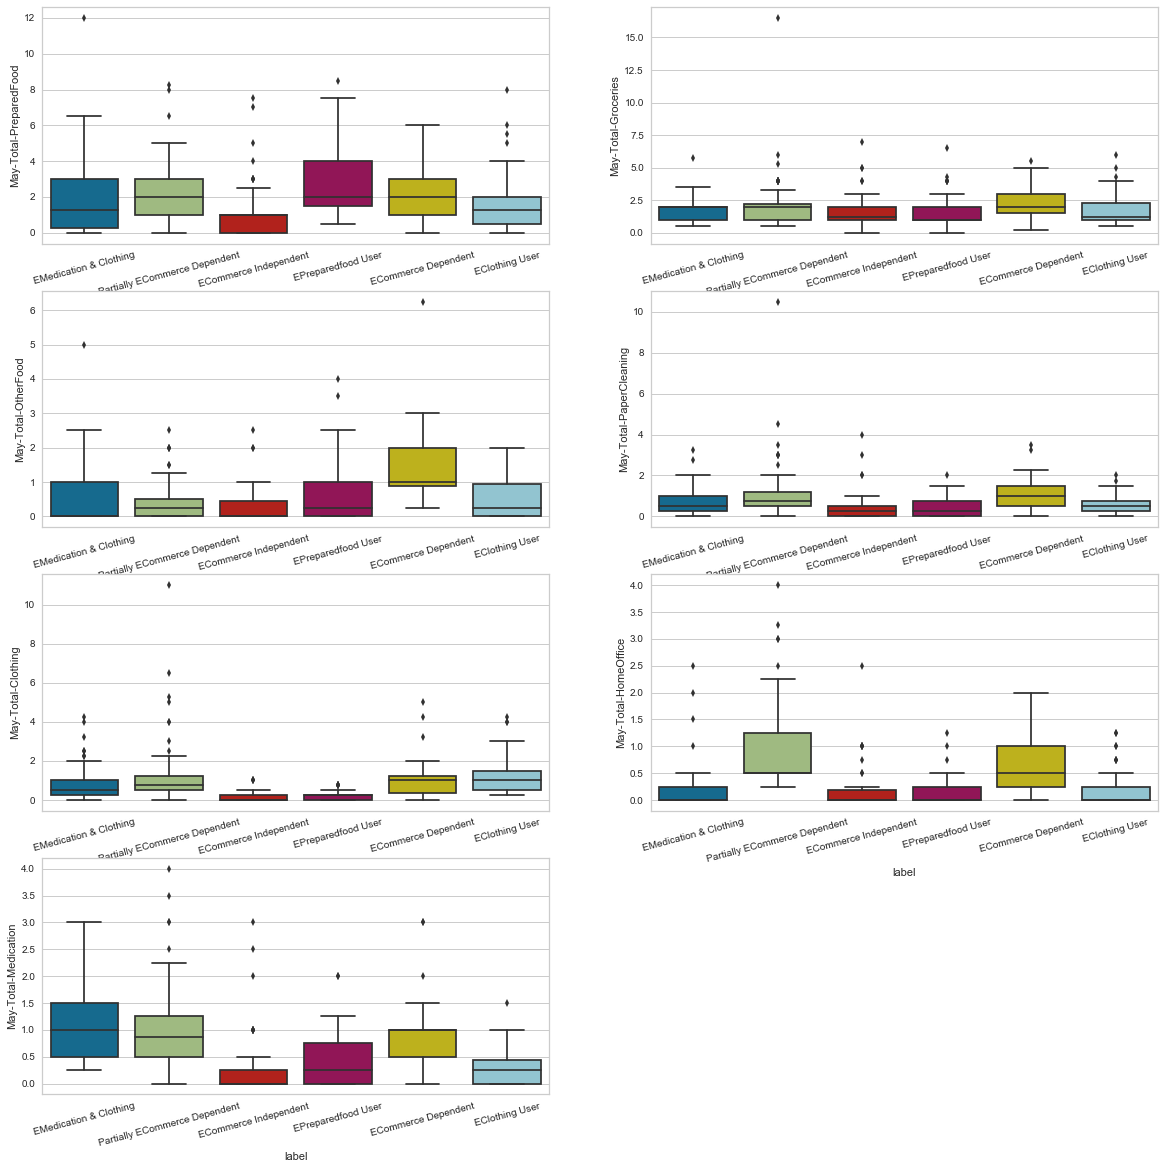

In [66]:
total = sacog[['May-Total-'+ cat_ for cat_ in cat]]/4
total['label'] = [group[x] for x in km.labels_]

plt.figure(figsize = (20, 20))
for i in range(len(cat)): 
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = 'label', y = 'May-Total-'+cat[i], data=total)
    plt.xticks(rotation=15)

#### Online shopping behaviors for each group of customers during past year (Jan/Feb 2019-2020) <br>
ECommerce Dependent User is the most likely to have already been exposed to online shopping for various category of products. As we can see, for ECommerce dependent group, the portion of customers who never did shopping for certain category of products through online channel in the past year is usually the lowest among all six shopping style groups. While in the contrast, ECommerce independent users is more likely to have never been exposed to online shopping in the past across all category of products. <br>
EMedication and clothing user is also a group of people who are less familiar with online shopping, see from the relative higher portion of people without online shopping experience for food and also paper cleaning. However, this group of people is more likely to have experience with online medication purchase compared to the other groups.<br>
EPreparedfood Users were more likely to order restaurant food online on a weekly basis with the largest portion of people indicating having online restaurant food ordered with a frequency about 1 time per week or higher in the past year.

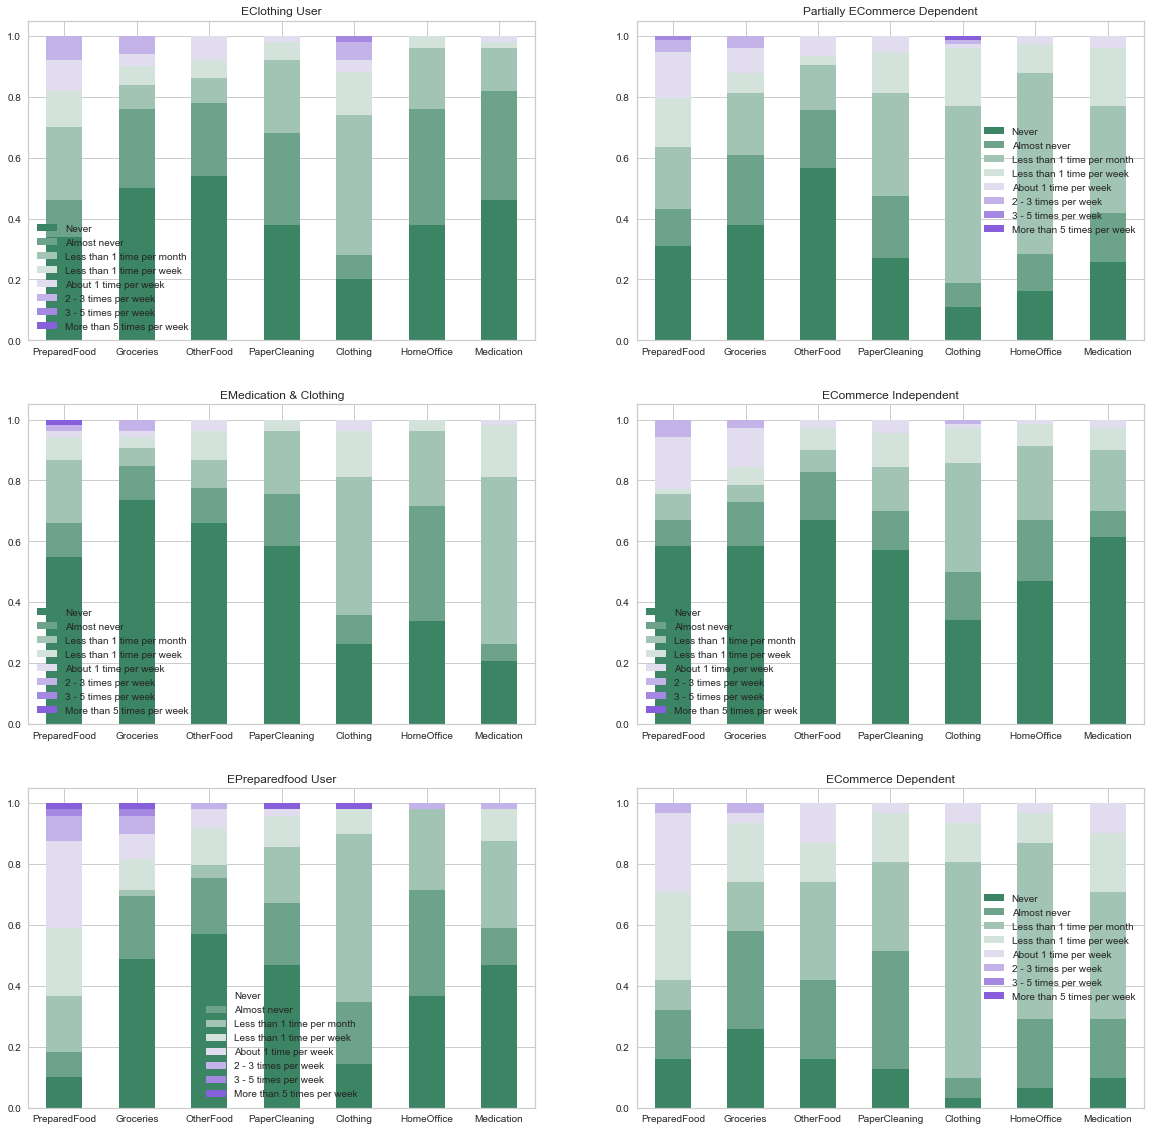

In [51]:
order = pd.Categorical(['Never', 'Almost never','Less than 1 time per month', 'Less than 1 time per week', 'About 1 time per week', '2 - 3 times per week', '3 - 5 times per week', 'More than 5 times per week'], ordered=True)
plt.figure(figsize=(20, 20))
for i in range(6):
    df = pd.DataFrame()
    plt.subplot(3, 2, i+1)
    for cat_ in cat:
        summary = sacog[km.labels_==i]['PastYear-ECommerce-Frequency-'+cat_].value_counts(normalize=True)
        df = df.join(summary, how='outer')
    df.set_axis(cat, axis = 1, inplace = True)
    df.reindex(order).T.plot(kind = 'bar',stacked=True, ax = plt.gca(), color=tuple(list(sns.diverging_palette(150, 275, sep=1, n=8))))
    plt.xticks(rotation=0)
    plt.title(group[i])

In [185]:
sacog.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Duration (in seconds)', 'Response ID', 'May-WorkingHours',
       'May-TelecommutingDays', 'May-Trips-Commuting', 'May-Trips-Medical',
       ...
       'May-Total-ChildcareItems', 'May-Portion-EChildcareItems',
       'PastYear-Tried-PreparedFood', 'PastYear-Tried-Groceries',
       'PastYear-Tried-OtherFood', 'PastYear-Tried-PaperCleaning',
       'PastYear-Tried-Clothing', 'PastYear-Tried-HomeOffice',
       'PastYear-Tried-Medication', 'PastYear-Tried-ChildcareItems'],
      dtype='object', length=754)

#### Membership


Restaurant (3%) and grocery delivery (3.6%) had the largest sign-up-due-to-COVID rate. In May, 10% of household had restaurant / grocery delivery service membership.

In [78]:
sacog[['Rewards-COVIDSignup-'+ prog for prog in program]].replace(-9998, 0).agg('mean', axis = 0)

Rewards-COVIDSignup-AmazonPrime           0.006116
Rewards-COVIDSignup-TargetCircle          0.012232
Rewards-COVIDSignup-Shoprunner            0.000000
Rewards-COVIDSignup-RestaurantDelivery    0.030581
Rewards-COVIDSignup-GroceryDelivery       0.036697
Rewards-COVIDSignup-Other                 0.006116
dtype: float64

In [71]:
program = ['AmazonPrime', 'TargetCircle','Shoprunner', 'RestaurantDelivery', 'GroceryDelivery','Other']
(sacog[['Rewards-Member-'+ pro_ for pro_ in program]].sum()/327).to_frame().T

,Rewards-Member-AmazonPrime,Rewards-Member-TargetCircle,Rewards-Member-Shoprunner,Rewards-Member-RestaurantDelivery,Rewards-Member-GroceryDelivery,Rewards-Member-Other
0,0.767584,0.269113,0.033639,0.100917,0.100917,0.06422


##### Heterogeneity of sign up rate across different groups
[Why ask about TargetCircle?] <br>
ECommerce Dependent group has the highest scbscription rate of (TargetCircle (35.5%) and) Grocery delivery (32.2%) service, second highest rate of AmazonPrime (87.1%) while partially ECommece dependent group has the highest AmazonPrime subscription rate (87.8%) and second highest TargetCircle subscription rate (33.8%).
In terms of membership of restaurant delivery, EpreparedFood user has the highest subscription rate (16.3%). <br>

Interestingly, compared to other group, ECommerce independent group has the third highest subscription rate of Target Circle. Since Target Circle is more of a membership for in-store shopping, it makes sense for this group to have a relatively high subscription ratio.

In [72]:
# ECommerce Independent group has the least portion of Amazon subscription while partially
membership = pd.DataFrame()
for prog in program:
    summary = sacog.groupby(km.labels_)['Rewards-Member-'+prog].mean().to_frame()
    membership = membership.join(summary, how = 'outer')
    
membership.set_axis(group, inplace=True)
membership

,Rewards-Member-AmazonPrime,Rewards-Member-TargetCircle,Rewards-Member-Shoprunner,Rewards-Member-RestaurantDelivery,Rewards-Member-GroceryDelivery,Rewards-Member-Other
EClothing User,0.760000,0.220000,0.000000,0.100000,0.100000,0.060000
Partially ECommerce Dependent,0.878378,0.337838,0.081081,0.108108,0.081081,0.067568
EMedication & Clothing,0.735849,0.169811,0.000000,0.056604,0.075472,0.075472
ECommerce Independent,0.671429,0.300000,0.028571,0.057143,0.085714,0.071429
EPreparedfood User,0.714286,0.224490,0.020408,0.163265,0.040816,0.081633
ECommerce Dependent,0.870968,0.354839,0.064516,0.161290,0.322581,0.000000


In terms of subscription length, all from ECommerce Dependent group who subscribes AmazonPrime have been in the membership for more than 2 years. The average of subscription length for partially ECommerce dependent group ranked the second. ECommerce independent group has the highest portion of household with a subscription length fewer than 3 months. 

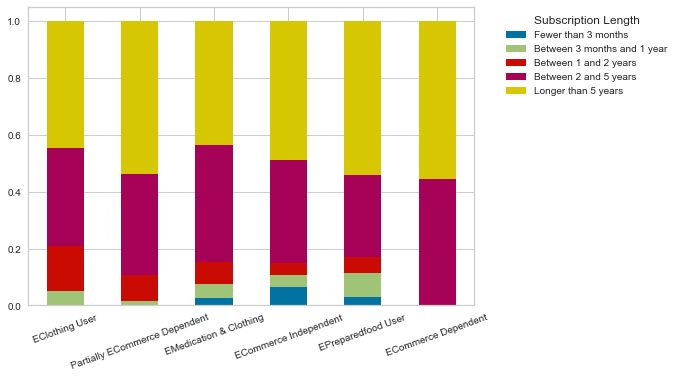

In [84]:
# ECommerce dependent group has the largest portion of people who subscribe prime membership for more than 5 years
df = pd.DataFrame()
order = pd.Categorical(['Fewer than 3 months', 'Between 3 months and 1 year', 'Between 1 and 2 years', 'Between 2 and 5 years', 'Longer than 5 years'], ordered = True)
for j in range(6):
    summary = sacog[(km.labels_ == j) & (~sacog['Rewards-Length-AmazonPrime'].isin(['No Response']))]['Rewards-Length-AmazonPrime'].value_counts(normalize = True).to_frame().rename(columns = {'Rewards-Length-AmazonPrime': group[j]})
    df = df.join(summary, how = 'outer')
#subLen.index.set_levels(group, level=0, inplace=True)
#subLen.plot(kind = 'bar', stacked = True)
df.reindex(order).T.plot(kind = 'bar', stacked = True)
plt.xticks(rotation = 20)
plt.legend(title='Subscription Length', bbox_to_anchor=(1.05, 1), loc='upper left')

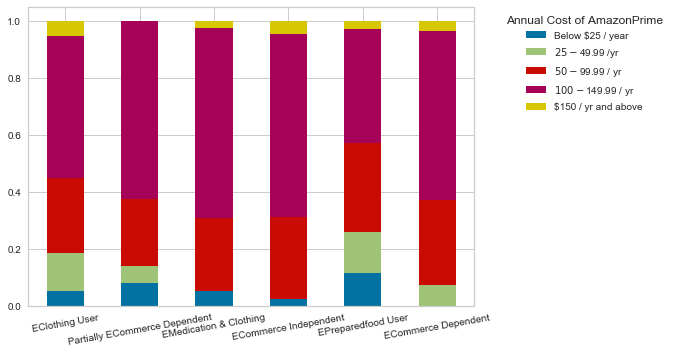

In [95]:
df = sacog.groupby(km.labels_)['Rewards-AnnualCost-AmazonPrime'].value_counts().unstack()
col = df.iloc[:,:5].columns.tolist() # remove no response
col = [col[4],col[2],col[3],col[0],col[1]]
(df[col].T/df[col].sum(axis=1)).rename(columns = {i: group[i] for i in range(6)}).T.plot(kind='bar', stacked = True)
plt.xticks(rotation = 10)
plt.legend(title = 'Annual Cost of AmazonPrime', bbox_to_anchor = (1.05, 1), loc = 'upper left')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

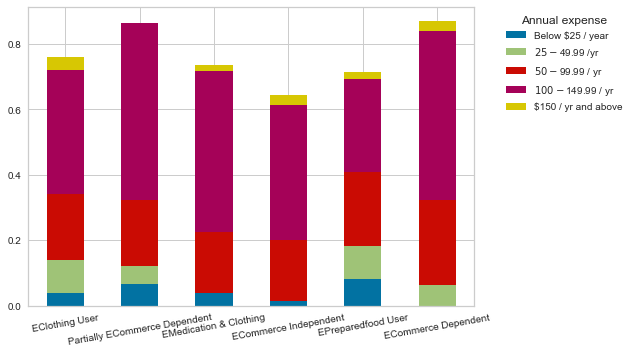

In [99]:
df = sacog.groupby(km.labels_)['Rewards-AnnualCost-AmazonPrime'].value_counts(normalize=True).unstack()
col = df.iloc[:,:5].columns.tolist()
col = [col[4],col[2],col[3],col[0],col[1]]
df.set_index([pd.Index(group)], inplace = True)
df[col].plot(kind = 'bar', stacked = True)

plt.legend(title = 'Annual expense', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 10)

In [116]:
subscription = ['Food','Clothing', 'PersonalCare', 'HouseholdItems']
membership = pd.DataFrame()
for prog in subscription:
    summary = sacog.groupby(km.labels_)['Subscription-Member-'+prog].mean().to_frame()
    membership = membership.join(summary, how = 'outer')
    
membership.set_axis(group, inplace=True)
membership

,Subscription-Member-Food,Subscription-Member-Clothing,Subscription-Member-PersonalCare,Subscription-Member-HouseholdItems
EClothing User,0.100000,0.040000,0.020000,0.160000
Partially ECommerce Dependent,0.121622,0.040541,0.081081,0.270270
EMedication & Clothing,0.150943,0.018868,0.037736,0.094340
ECommerce Independent,0.028571,0.028571,0.057143,0.057143
EPreparedfood User,0.122449,0.040816,0.081633,0.142857
ECommerce Dependent,0.483871,0.096774,0.096774,0.258065


Intention

In [103]:
np.sum(sacog[['DoInStage23-BundlingOnlineGroceries',
 'DoInStage23-CrowdSourcedDelivery',
 'DoInStage23-ContactlessCurbside',
 'DoInStage23-ContactlessDoor',
 'DoInStage23-ContactlessDriverless',
 'DoInStage23-CurbsidePickup',
 'DoInStage23-InStorePickup',
 'DoInStage23-LockerPickup',
 'DoInStage23-DroneDelivery',
 'DoInStage23-VisitRetail',
 'DoInStage23-VisitRestaurant',
 'DoInStage23-VisitBar']] == -9998)

DoInStage23-BundlingOnlineGroceries    2
DoInStage23-CrowdSourcedDelivery       2
DoInStage23-ContactlessCurbside        4
DoInStage23-ContactlessDoor            4
DoInStage23-ContactlessDriverless      3
DoInStage23-CurbsidePickup             3
DoInStage23-InStorePickup              4
DoInStage23-LockerPickup               3
DoInStage23-DroneDelivery              3
DoInStage23-VisitRetail                2
DoInStage23-VisitRestaurant            2
DoInStage23-VisitBar                   2
dtype: int64

In [ ]:
sacog.groupby(km.labels_)[]

### Look into their shopping attitude

In [169]:
pd.crosstab(km_past.labels_, km.labels_, margins = True).rename(columns = {0: 'Partial ECommerce Dependent', 1:'ECommerce Independent', 2:'ECommerce Dependent', 3:'EPreparedfood User', 4:'EClothing User', 5:'EMedication & Clothing'},
                                                                index = {0: 'ECommerce Ind', 5: 'ERes', 1: 'EGro & Res', 3: 'EClothing', 4: 'Highly Dep', 2: 'Somewhat ERes penetrated'})

col_0,Partial ECommerce Dependent,ECommerce Independent,ECommerce Dependent,EPreparedfood User,EClothing User,EMedication & Clothing,All
row_0,,,,,,,
ECommerce Ind,50,49,15,26,41,45,226
EGro & Res,2,2,1,4,3,1,13
Somewhat ERes penetrated,13,13,13,13,7,4,63
EClothing,2,1,0,0,3,0,6
Highly Dep,0,0,0,1,0,0,1
ERes,4,4,1,4,4,1,18
All,71,69,30,48,58,51,327


#### 1) orders - trips

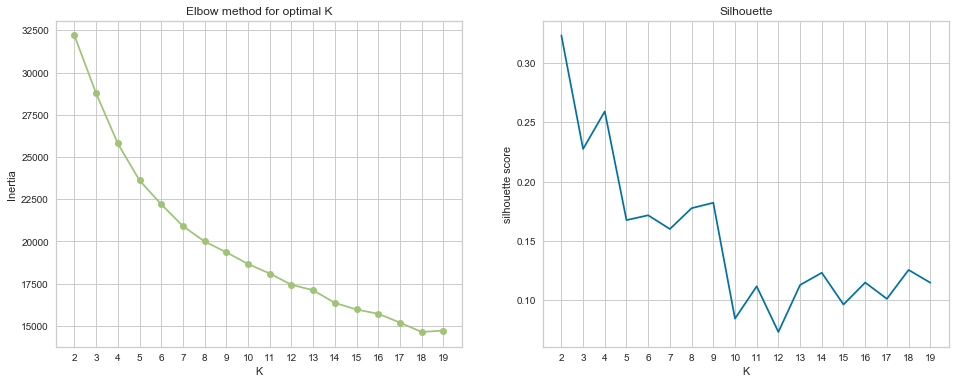

In [174]:
X = sacog[['May-Orders-'+cat_ for cat_ in cat]+['May-Trips-'+cat_ for cat_ in cat]].drop(48)
choose_k(X, 20)

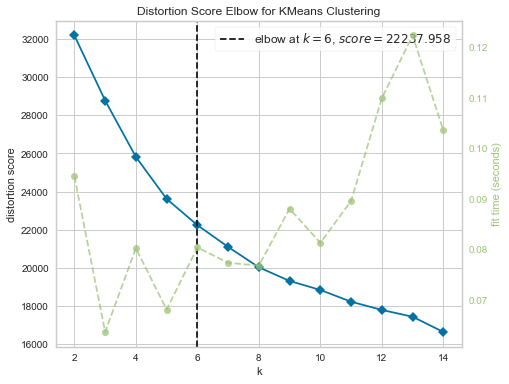

In [175]:
plt.figure(figsize = (16, 6))
plt.subplot(1,2,1)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 15))
visualizer.fit(X)
visualizer.show()

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 37, 144,  16,  14,  47,  68]))

array([[ 1.91891892,  1.18918919,  0.16216216,  0.18918919,  1.05405405,
         0.51351351,  1.62162162, 12.64864865,  7.78378378,  1.32432432,
         2.62162162,  0.86486486,  1.        ,  1.56756757],
       [ 1.60416667,  1.34722222,  0.70833333,  0.54166667,  1.04861111,
         0.52777778,  0.86805556,  2.39583333,  3.375     ,  1.0625    ,
         1.39583333,  0.625     ,  0.4375    ,  0.92361111],
       [17.375     ,  3.4375    ,  1.25      ,  1.3125    ,  5.25      ,
         0.8125    ,  1.375     , 10.3125    ,  8.875     ,  2.1875    ,
         2.375     ,  1.125     ,  0.8125    ,  2.        ],
       [ 3.5       ,  1.64285714,  0.64285714,  2.71428571, 17.71428571,
         1.71428571,  2.78571429,  3.35714286,  6.71428571,  1.92857143,
         1.71428571,  0.28571429,  1.64285714,  1.28571429],
       [ 8.38297872,  2.57446809,  1.95744681,  2.23404255,  1.82978723,
         1.87234043,  2.76595745,  4.63829787,  4.82978723,  1.44680851,
         2.25531915,  1.14

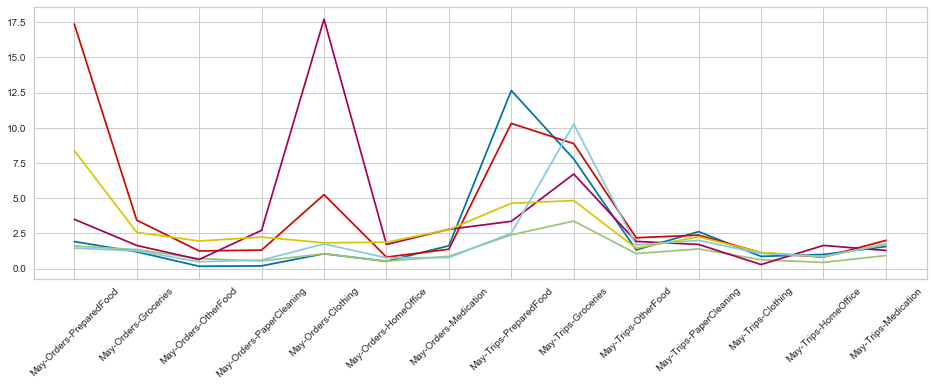

In [178]:
X = sacog[['May-Orders-'+cat_ for cat_ in cat]+['May-Trips-'+cat_ for cat_ in cat]].drop(48)
km = optimal_k(X, 6)
km.cluster_centers_

In [177]:
sacog.drop(48).groupby(km.labels_)[['May-Portion-E'+cat_ for cat_ in cat]].mean()

,May-Portion-EPreparedFood,May-Portion-EGroceries,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EClothing,May-Portion-EHomeOffice,May-Portion-EMedication
0,0.292667,0.078400,0.170270,0.161756,0.446516,0.417886,0.323457
1,0.634927,0.216713,0.344048,0.292063,0.767873,0.402778,0.351282
2,0.640768,0.320306,0.393143,0.395142,0.551762,0.570183,0.516524
3,0.118293,0.081491,0.128205,0.110417,0.316444,0.263636,0.408642
4,0.523077,0.174830,0.242424,0.440018,0.981408,0.535354,0.630556
5,0.333333,0.176155,0.303125,0.207358,0.508070,0.437571,0.348272


#### 2) Portion - total

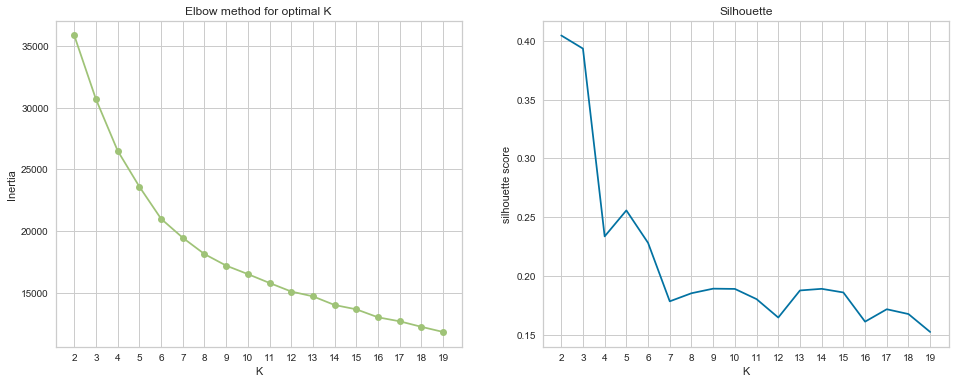

In [163]:
X = sacog[['May-Portion-E'+cat_ for cat_ in cat]+['May-Total-'+cat_ for cat_ in cat]]
choose_k(X, 20)

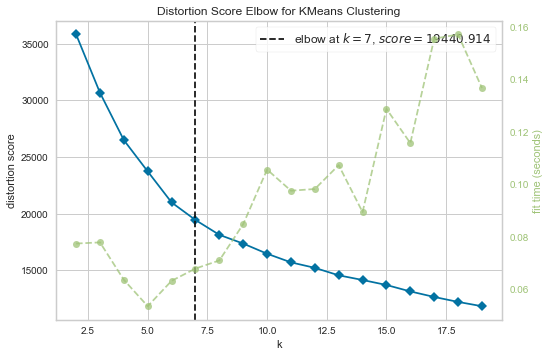

In [164]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20))
visualizer.fit(X.fillna(0))
visualizer.show()

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([109,  23,  36,  15,  49,  80,  14]))

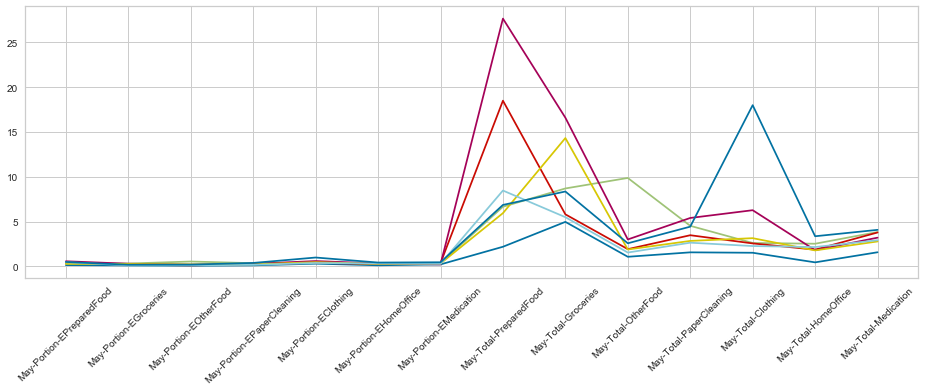

In [166]:
km = optimal_k(X.drop(48), 7)

array([[0.13425076, 0.10214067, 0.06574924, 0.10742682, 0.29357798,
        0.1146789 , 0.21182467],
       [0.3115942 , 0.31208135, 0.53594203, 0.3478951 , 0.37536232,
        0.37101449, 0.34782609],
       [0.44034264, 0.18354377, 0.09537037, 0.24974747, 0.37746914,
        0.26203704, 0.35092593],
       [0.56255777, 0.28972916, 0.18349206, 0.2837037 , 0.58474946,
        0.32222222, 0.21555556],
       [0.27785752, 0.26770166, 0.21360544, 0.22605965, 0.46190476,
        0.26870748, 0.3122449 ],
       [0.45347222, 0.10479167, 0.09666667, 0.16375   , 0.36875   ,
        0.31341346, 0.27875   ],
       [0.48571429, 0.17482993, 0.19047619, 0.37715856, 0.98140795,
        0.42063492, 0.45039683]])

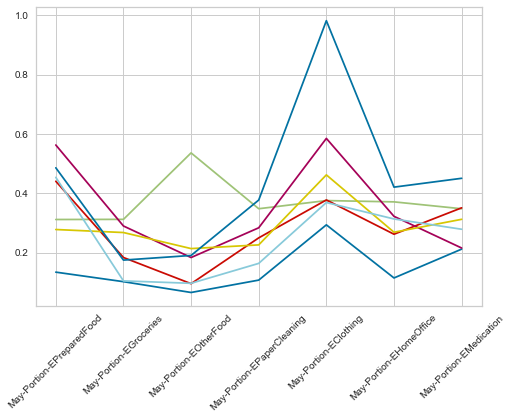

In [167]:
plt.plot(X.columns[:7], km.cluster_centers_[:,:7].T)
plt.xticks(rotation=45)
km.cluster_centers_[:,:7]

#### 3) total

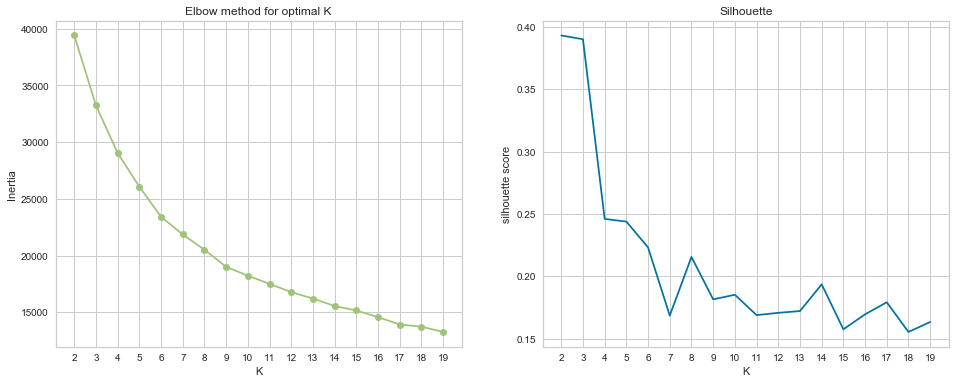

In [66]:
X = sacog[['May-Total-'+cat_ for cat_ in cat]]
choose_k(X, 20)

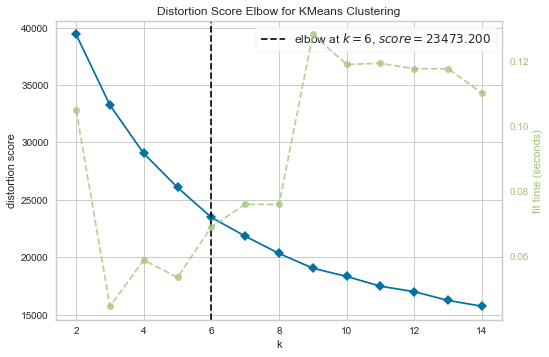

In [69]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 15))
visualizer.fit(X)
visualizer.show()

 #### 4) Portion

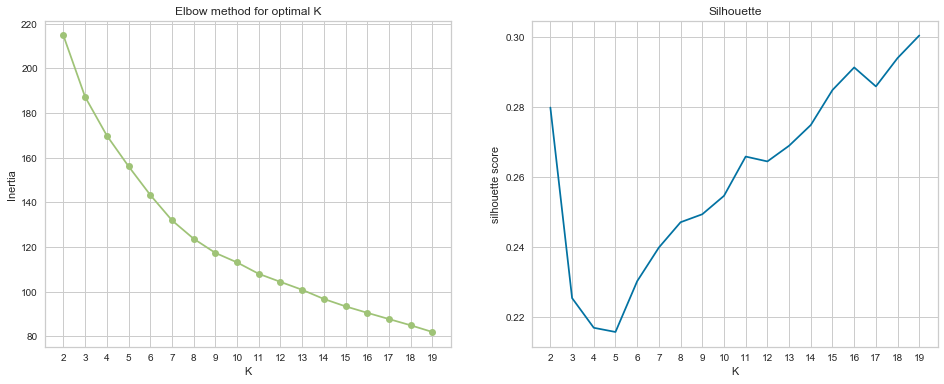

In [124]:
X = sacog[['May-Portion-E'+cat_ for cat_ in cat]]
choose_k(X, 20)

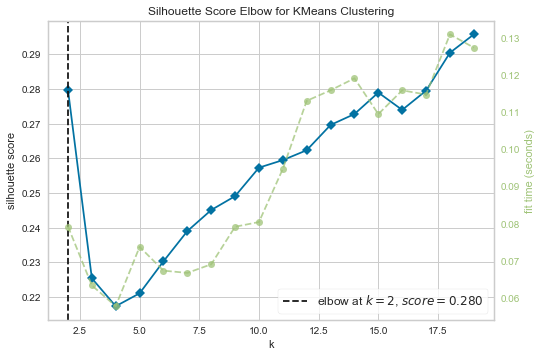

In [133]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20), metric = 'silhouette')
X = X.fillna(0)
visualizer.fit(X)
visualizer.show()